<a href="https://colab.research.google.com/github/22Ifeoma22/22Ifeoma22/blob/main/LinearModelUsingAutograd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import matplotlib.pyplot as plt

#### Creating Dataset
A simple dataset using numpy arrays

In [12]:
x_train = np.array ([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042] ,
                    [10.791], [5.313], [7.997], [3.1]],
                    dtype = np.float32)

y_train = np.array ([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827] ,
                    [3.465], [1.65], [2.904], [1.3]],
                    dtype = np.float32)

#### View the data
There seems to be some relationship which can be plotted between x_train and y_train. A regression line can be drawn to represent the relationship

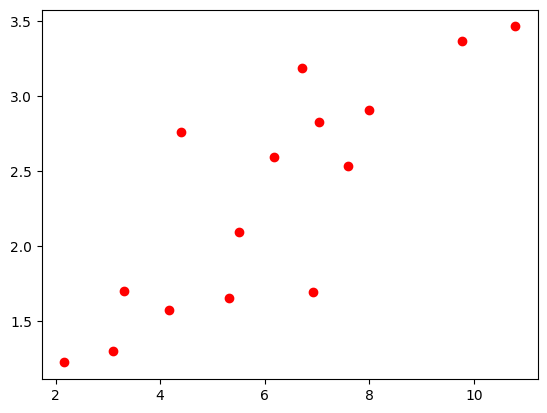

In [13]:
plt.plot(x_train, y_train, 'ro', label = 'Original data')

plt.show()

In [14]:
import torch

#### Converting data to pytorch tensors
By defualt requires_grad = False

In [15]:
X_train = torch.from_numpy(x_train)
Y_train = torch.from_numpy(y_train)

print('requires_grad for X_train: ', X_train.requires_grad)
print('requires_grad for Y_train: ', Y_train.requires_grad)

requires_grad for X_train:  False
requires_grad for Y_train:  False


#### Set the details for our neural network
Input, output and hidden layer sizes plus the learning rate

In [16]:
input_size = 1
hidden_size = 100
output_size = 1
learning_rate = 1e-6

#### Create random Tensors for weights.<br>
Setting requires_grad=True indicates that we want to compute gradients with respect to these Tensors during the backward pass

In [17]:
w1 = torch.rand(input_size,
                hidden_size,

                requires_grad=True)
w1.shape

torch.Size([1, 100])

In [18]:
w2 = torch.rand(hidden_size,
                output_size,

                requires_grad=True)
w2.shape

torch.Size([100, 1])

## Training

#### Foward Pass:
* Predicting Y with input data X
* finding (matrix X matrix) using .mm function, finding product of X_train and w1
* clamping all negative elements to one using clamp(min=0), similar to Relu Function
* again doing mat product of clamped data with second weight w2

#### Finding Loss:
* Finding difference between Y_train and Y_pred by squaring the difference and then summing out, similar to nn.MSELoss


#### For the loss_backward() function call:
* backward pass will compute the gradient of loss with respect to all Tensors with requires_grad=True.
* After this call w1.grad and w2.grad will be Tensors holding the gradient of the loss with respect to w1 and w2 respectively.

#### Manually updating the weights
* weights have requires_grad=True, but we don't need to track this in autograd. So will wrap it in torch.no_grad
* reducing weight with multiple of learning rate and gradient
* manually zero the weight gradients after updating weights

In [19]:
for iter in range(1, 301):

    y_pred = X_train.mm(w1).clamp(min=0).mm(w2)
    loss = (y_pred - Y_train).pow(2).sum()

    if iter % 50 ==0:
        print(iter, loss.item())

    loss.backward()

    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        w1.grad.zero_()
        w2.grad.zero_()

50 4998.53369140625
100 162.6100311279297
150 9.292095184326172
200 3.8444888591766357
250 3.64056134223938
300 3.6329257488250732


In [20]:
print ('w1: ', w1)
print ('w2: ', w2)

w1:  tensor([[ 4.3790e-01,  2.2215e-01,  7.6341e-01,  9.3982e-01, -9.2791e-03,
          2.9251e-02, -1.0558e-02,  1.6615e-01,  1.1881e-01, -2.1839e-02,
         -3.1475e-04,  3.4709e-02,  2.0883e-01,  7.4622e-01, -1.2495e-02,
          1.3519e-01,  4.5951e-01,  2.4541e-02,  7.7496e-03, -1.1659e-03,
         -1.2742e-03,  1.4379e-01, -1.9394e-02,  4.9754e-01, -2.0973e-02,
          5.9035e-01,  3.9784e-01, -1.3393e-04,  4.9035e-01,  3.6519e-01,
          5.4854e-01, -1.0704e-03, -1.7996e-03,  9.1057e-01, -2.4548e-05,
          3.6088e-01, -1.4215e-03,  2.8782e-01,  5.5802e-01,  1.3038e-01,
          1.8780e-01,  7.8565e-01,  7.3883e-01, -8.4382e-04,  4.0819e-01,
          7.9339e-03, -1.8273e-02, -7.1284e-03,  7.6539e-01,  2.9185e-01,
          3.0628e-01,  3.2692e-01,  8.0438e-01,  2.2413e-01, -3.1254e-03,
          5.4429e-01,  7.0311e-01,  3.8188e-01,  1.9791e-02, -9.0671e-03,
          1.1177e+00,  7.2961e-02,  4.7873e-02,  1.0040e+00,  1.3289e-01,
         -6.6202e-04,  5.1704e-01

#### Checking the output

Converting data into a tensor

In [21]:
x_train_tensor = torch.from_numpy(x_train)
x_train_tensor

tensor([[ 3.3000],
        [ 4.4000],
        [ 5.5000],
        [ 6.7100],
        [ 6.9300],
        [ 4.1680],
        [ 9.7790],
        [ 6.1820],
        [ 7.5900],
        [ 2.1670],
        [ 7.0420],
        [10.7910],
        [ 5.3130],
        [ 7.9970],
        [ 3.1000]])

#### Get the predicted values using the weights
Using final weights calculated from our training in order to get the predicted values

In [22]:
predicted_in_tensor = x_train_tensor.mm(w1).clamp(min=0).mm(w2)
predicted_in_tensor

tensor([[1.2137],
        [1.6182],
        [2.0228],
        [2.4678],
        [2.5487],
        [1.5329],
        [3.5965],
        [2.2736],
        [2.7914],
        [0.7970],
        [2.5899],
        [3.9687],
        [1.9540],
        [2.9411],
        [1.1401]], grad_fn=<MmBackward0>)

#### Convert the prediction to a numpy array
This will be used to plot the regression line in a plot

In [23]:
predicted = predicted_in_tensor.detach().numpy()
predicted

array([[1.2136699 ],
       [1.6182262 ],
       [2.0227838 ],
       [2.4677942 ],
       [2.548706  ],
       [1.5329013 ],
       [3.5965087 ],
       [2.2736068 ],
       [2.7914405 ],
       [0.79697657],
       [2.5898976 ],
       [3.9687004 ],
       [1.9540079 ],
       [2.9411263 ],
       [1.1401141 ]], dtype=float32)

#### Plotting
Our training has produced a rather accurate regression line

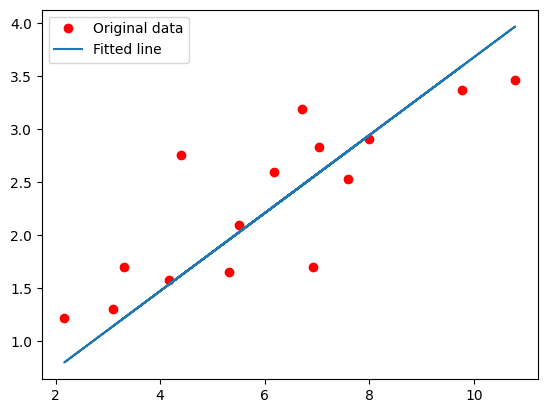

In [24]:
plt.plot(x_train, y_train, 'ro', label = 'Original data')

plt.plot(x_train, predicted, label = 'Fitted line ')

plt.legend()

plt.show()